# Exploratory Data Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset:

In [6]:
dataset=pd.read_csv('data/loan_approval_dataset.csv')
dataset[' loan_status']

0        Approved
1        Rejected
2        Rejected
3        Rejected
4        Rejected
          ...    
4264     Rejected
4265     Approved
4266     Rejected
4267     Approved
4268     Approved
Name:  loan_status, Length: 4269, dtype: object

#### Understanding the dataset

In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


#### Statistics of Dataset

In [28]:
dataset.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [29]:
dataset[' loan_status'].value_counts()

 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Values are imbalanced, So we have to remove some values
##### For that purpose, I am going to use RandomUnderSampler

In [30]:
X=dataset.drop(columns=[' loan_status'])
y=dataset[' loan_status']

In [31]:
from imblearn.under_sampling import RandomUnderSampler
ru=RandomUnderSampler()

In [32]:
x,y=ru.fit_resample(X,y)

In [33]:
dataset=pd.concat([x,y],axis=1)
dataset[' loan_status'].value_counts()
dataset

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1074,1075,1,Graduate,No,6800000,22900000,4,501,3900000,9400000,17300000,4400000,Approved
3795,3796,5,Not Graduate,Yes,3800000,9100000,18,654,9000000,4000000,10200000,3000000,Approved
3708,3709,3,Graduate,No,6100000,20700000,4,816,14900000,5400000,24200000,5900000,Approved
4232,4233,1,Graduate,Yes,200000,500000,20,713,0,200000,500000,100000,Approved
1761,1762,2,Not Graduate,Yes,9800000,32700000,2,304,4700000,19000000,24500000,8600000,Approved
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4258,4259,5,Graduate,Yes,9700000,22600000,16,346,23500000,12900000,26800000,13000000,Rejected
4259,4260,0,Not Graduate,Yes,4500000,11500000,14,509,13400000,2300000,15400000,5900000,Rejected
4262,4263,5,Graduate,No,1300000,3000000,20,540,1000000,2300000,3200000,1900000,Rejected
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected


# Checking for Outliers in dataset

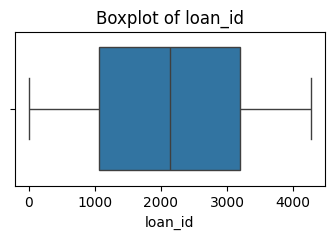

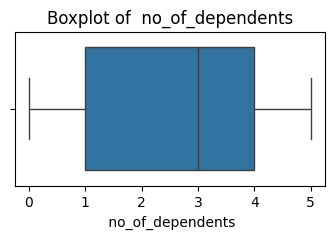

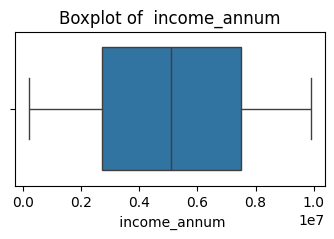

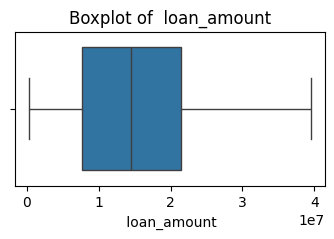

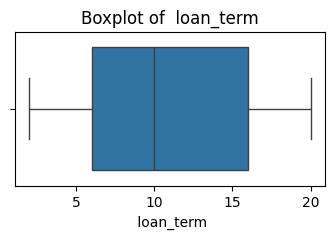

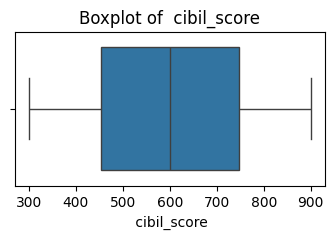

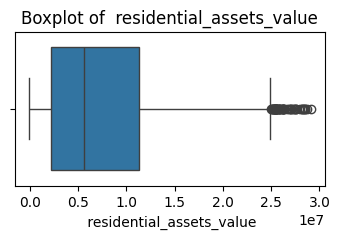

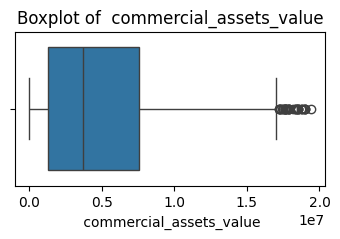

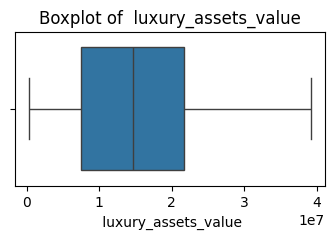

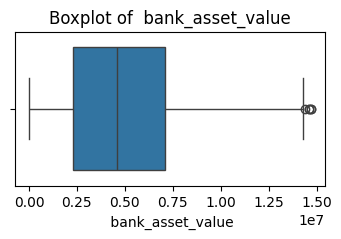

In [34]:
num_cols = dataset.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=X[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

There are definetly Outliers in Residential and Commertial assets. 
##### Now let's remove it

In [35]:
q1=dataset[' residential_assets_value'].quantile(0.25)
q2=dataset[' residential_assets_value'].quantile(0.75)
q1_c=dataset[' commercial_assets_value'].quantile(0.25)
q2_c=dataset[' commercial_assets_value'].quantile(0.75)
IQR=q2-q1
IQR_c=q2_c-q1_c

In [36]:
max_val=q2+1.5*IQR
max_val_c=q2_c+1.5*IQR_c
dataset=dataset[dataset[' residential_assets_value']<max_val]
dataset=dataset[dataset[' commercial_assets_value']<max_val_c]
dataset.shape

(3164, 13)

<Axes: xlabel=' residential_assets_value'>

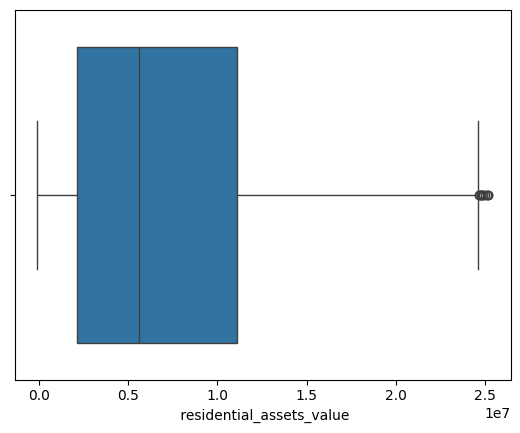

In [37]:
sns.boxplot(x=dataset[' residential_assets_value'])

<Axes: xlabel=' commercial_assets_value'>

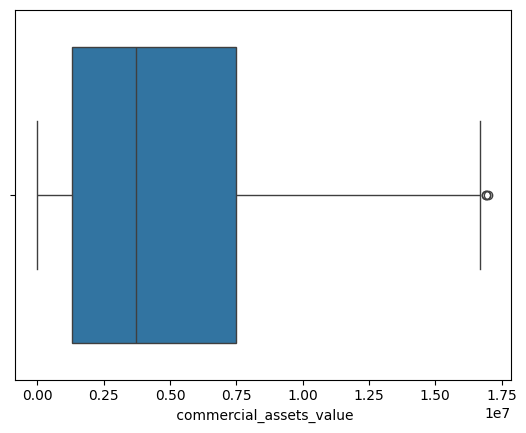

In [38]:
sns.boxplot(x=dataset[' commercial_assets_value'])

Most of Outliers have been Removed

## Now, Let's do Encoding for Object Features.

In [39]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3164 entries, 1074 to 4266
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    3164 non-null   int64 
 1    no_of_dependents          3164 non-null   int64 
 2    education                 3164 non-null   object
 3    self_employed             3164 non-null   object
 4    income_annum              3164 non-null   int64 
 5    loan_amount               3164 non-null   int64 
 6    loan_term                 3164 non-null   int64 
 7    cibil_score               3164 non-null   int64 
 8    residential_assets_value  3164 non-null   int64 
 9    commercial_assets_value   3164 non-null   int64 
 10   luxury_assets_value       3164 non-null   int64 
 11   bank_asset_value          3164 non-null   int64 
 12   loan_status               3164 non-null   object
dtypes: int64(10), object(3)
memory usage: 346.1+ KB


### Education and self_employed need to be encoded

In [40]:
dataset=pd.get_dummies(dataset,columns=[' education',' self_employed'],drop_first=True)

In [41]:
x=dataset.drop(columns=[' loan_status'])
x=x.astype('int64')

## Scalling for Numerical Features of x

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)

In [43]:
X=pd.DataFrame(X,columns=x.columns)
X

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education_ Not Graduate,self_employed_ Yes
0,-0.858031,-0.883716,0.656401,0.906705,-1.247531,-0.375891,-0.539455,1.086522,0.266597,-0.163507,-0.992443,-1.003166
1,1.355238,1.470380,-0.435492,-0.654721,1.225202,0.522240,0.280490,-0.201027,-0.529032,-0.602220,1.007614,0.996844
2,1.284472,0.293332,0.401626,0.657782,-1.247531,1.473203,1.229054,0.132782,1.039814,0.306543,-0.992443,-1.003166
3,1.710695,-0.883716,-1.745762,-1.627784,1.578450,0.868579,-1.166472,-1.107080,-1.616018,-1.510984,-0.992443,0.996844
4,-0.986548,-0.883716,0.692797,1.280090,-1.247531,-0.182177,1.164745,1.682610,-0.002348,1.403326,1.007614,-1.003166
...,...,...,...,...,...,...,...,...,...,...,...,...
3159,1.731844,1.470380,1.711896,0.872761,0.871954,-1.285763,2.611707,1.921045,1.331171,2.531446,-0.992443,0.996844
3160,1.732657,-1.472240,-0.180717,-0.383169,0.518707,-0.328930,0.987894,-0.606366,0.053682,0.306543,1.007614,0.996844
3161,1.735097,1.470380,-1.345402,-1.344917,1.578450,-0.146956,-1.005699,-0.606366,-1.313455,-0.946924,-0.992443,-1.003166
3162,1.736724,1.470380,-1.454591,-1.424119,0.165459,-1.455997,-0.716306,-1.035550,-1.302249,-1.291627,-0.992443,0.996844


In [44]:
y

1074     Approved
3795     Approved
3708     Approved
4232     Approved
1761     Approved
          ...    
4258     Rejected
4259     Rejected
4262     Rejected
4264     Rejected
4266     Rejected
Name:  loan_status, Length: 3226, dtype: object

# Some Visualizations of dataset

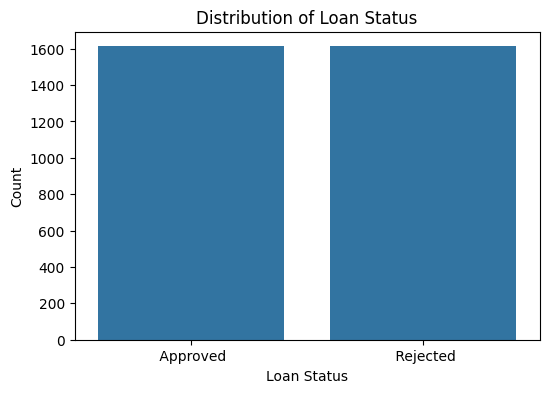

In [45]:
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title("Distribution of Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

As I did finish Imbalancing, So this is absoluetly same

### The relation between X and y

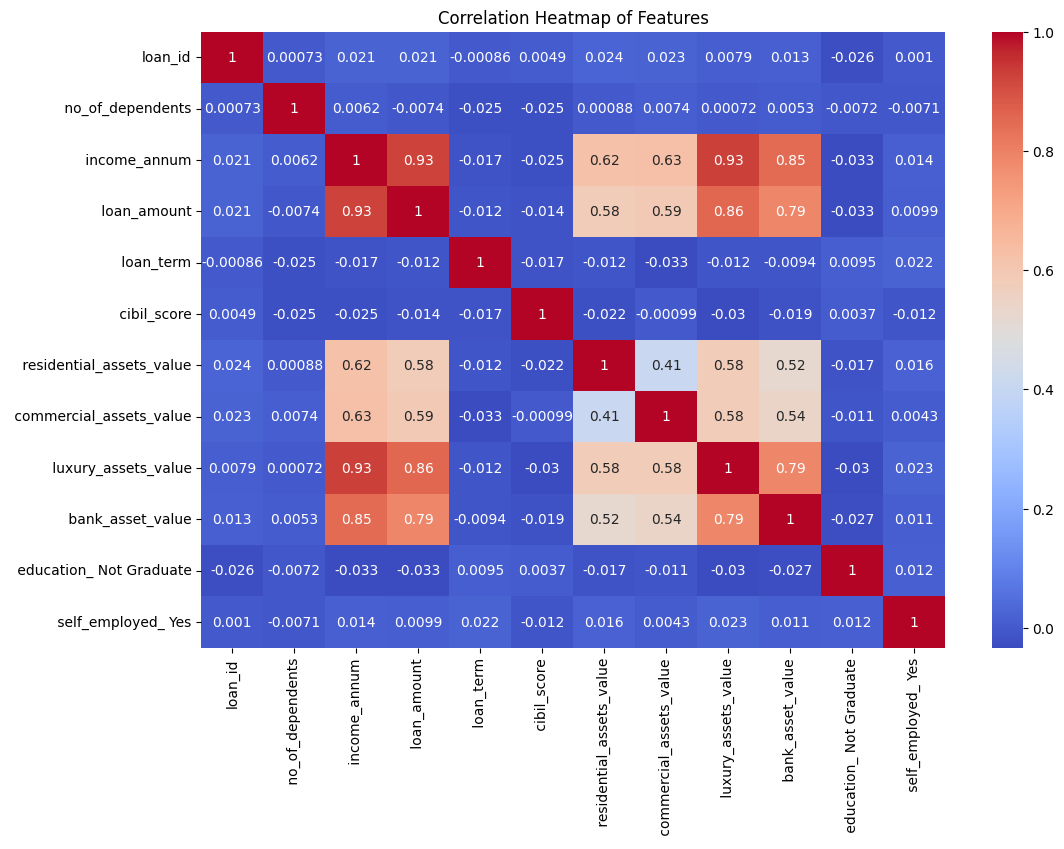

In [46]:
plt.figure(figsize=(12,8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()

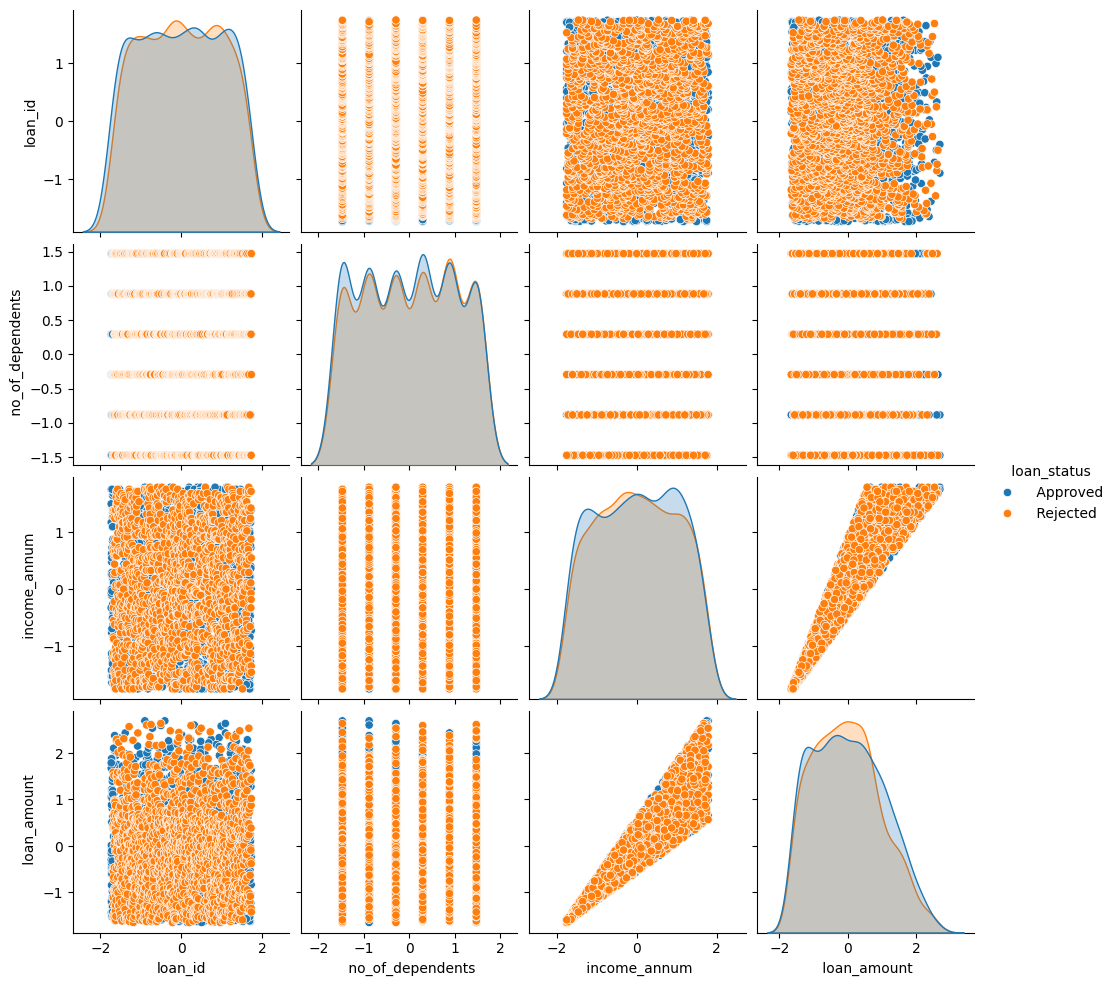

In [47]:
selected_cols = X.columns[:4].tolist()  # Change as needed
sns.pairplot(pd.concat([X[selected_cols], y.reset_index(drop=True)], axis=1), hue=' loan_status')
plt.show()

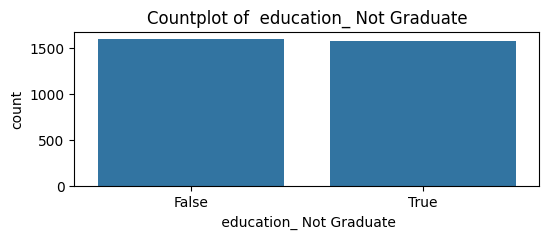

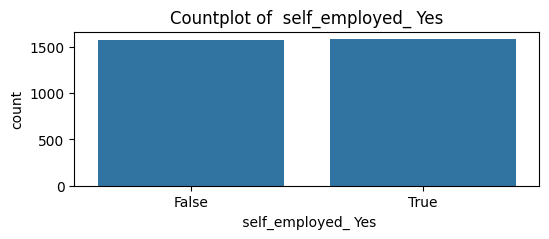

In [49]:
cat_cols = [col for col in dataset.columns if 'education' in col or 'self_employed' in col]
for col in cat_cols:
    plt.figure(figsize=(6,2))
    sns.countplot(x=dataset[col])
    plt.title(f"Countplot of {col}")
    plt.show()